### Song Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [3]:
df.shape #lets look at the shape

(169909, 19)

In [4]:
df.columns #lets look at the columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [5]:
df.isnull().sum() #investigate missing values

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

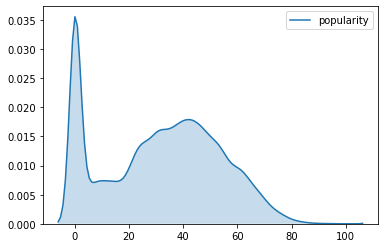

In [6]:
sns.kdeplot(df['popularity'],shade=True) #understand the distribution of popularity

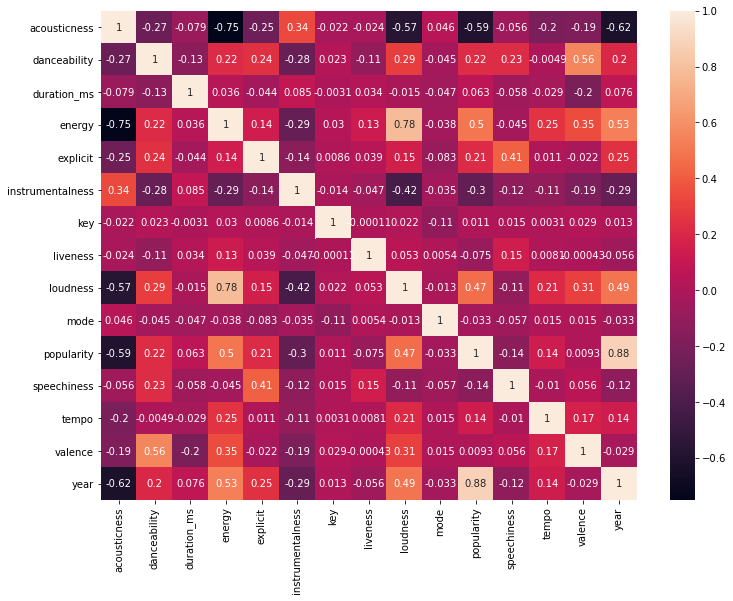

In [7]:
corr=df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)

In [8]:
print(corr['popularity'].sort_values(ascending=False))

popularity          1.000000
year                0.880724
energy              0.497488
loudness            0.466546
danceability        0.221077
explicit            0.214044
tempo               0.135047
duration_ms         0.063292
key                 0.010675
valence             0.009327
mode               -0.032854
liveness           -0.075293
speechiness        -0.135707
instrumentalness   -0.299829
acousticness       -0.593345
Name: popularity, dtype: float64


#### Popularity has highest correlation with year followed by energy and loudness

In [9]:
df.loc[df['popularity'] < 57, 'popularity'] = 0 #assigning 0 to ratings less than 57
df.loc[df['popularity'] >= 57, 'popularity'] = 1 #assigning 0 to ratings greater than 57
df.loc[df['popularity'] == 1]


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
3366,0.7280,['Mia Martini'],0.248,283893,0.483,0,5UKMdUAChYAllKDye6qDGb,0.000004,9,0.6310,-11.279,1,Minuetto,1,1973-06-23,0.0678,191.107,0.439,1973
4558,0.7240,['Roupa Nova'],0.489,242733,0.475,0,4Bd8jSFBXHC1K7JAKW9Ojm,0.000000,7,0.5050,-9.565,1,Dona,1,1985-08-22,0.0343,139.213,0.307,1985
4561,0.3200,['Legião Urbana'],0.612,237733,0.675,0,7uscfoAoI65JcSY4NyHg1t,0.000930,2,0.0861,-10.390,1,Ainda É Cedo,1,1985-01-01,0.0388,148.336,0.803,1985
4617,0.0506,['Patricio Rey y sus Redonditos de Ricota'],0.641,247067,0.677,0,5WeBnrDPyLhxruxVryHCkn,0.112000,7,0.0687,-10.142,1,La Bestia Pop,1,1985-04-22,0.0327,120.666,0.896,1985
4720,0.1330,['Duncan Dhu'],0.593,169773,0.943,0,020Gj87SqDRvzGHELzcCEc,0.000044,9,0.0478,-4.503,1,Cien gaviotas,1,1986-01-17,0.0424,136.027,0.846,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.443,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,1,2020-05-15,0.1430,100.012,0.306,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.385,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),1,2020-06-08,0.0403,128.000,0.270,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.539,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,1,2020-05-29,0.1050,123.700,0.153,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.761,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,1,2020-02-28,0.0385,129.916,0.472,2020


### Training the Model

In [10]:
features=['year','energy','loudness','danceability','explicit','tempo','duration_ms','acousticness']
X=df[features]
y=df.popularity

In [11]:
#train-test split and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=1)

scale=StandardScaler()
train_X=scale.fit_transform(train_X)
test_X=scale.transform(test_X)

### Comparing different algorithms

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(train_X,train_y)

pred_y=reg.predict(test_X)
LR=(reg.score(test_X,test_y)*100)
print(LR)

24.08700745529281


In [13]:
from sklearn.ensemble import RandomForestClassifier
model_r=RandomForestClassifier(n_estimators=100,random_state=1)
model_r.fit(train_X,train_y)
model_r.predict(test_X)
RM=(model_r.score(test_X,test_y)*100)
print(RM)

91.6720616797128


In [14]:
from sklearn.tree import DecisionTreeClassifier
model_d=DecisionTreeClassifier(random_state=1)
model_d.fit(train_X,train_y)
model_d.predict(test_X)
DC=(model_d.score(test_X,test_y)*100)
print(DC)

86.84597728209052


In [15]:
model_accuracy=pd.DataFrame({'Model': ['Linear Regression','Random forest classifier','Decision tree classifier'],'Accuracy': [LR,RM,DC]})

In [16]:
model_accuracy.sort_values(ascending=False,by='Accuracy')

,Model,Accuracy
1,Random forest classifier,91.672062
2,Decision tree classifier,86.845977
0,Linear Regression,24.087007


#### Random Forest Classifer performs best in this case